In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import math

In [2]:
columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
dataset=pd.read_csv("housing.csv", names=columns , delim_whitespace=True)


In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Plot All columns with the target to see the shape of the graph

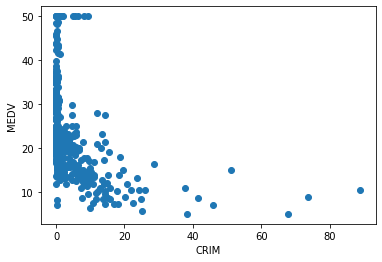

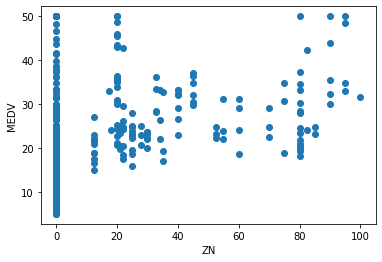

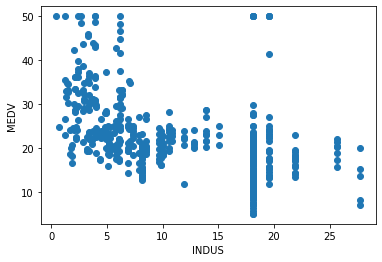

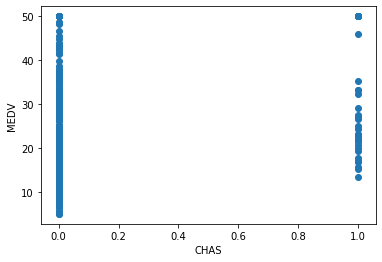

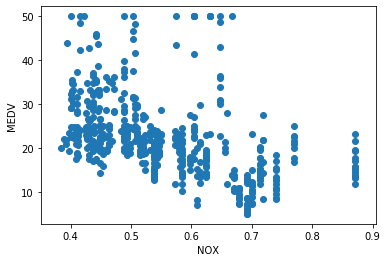

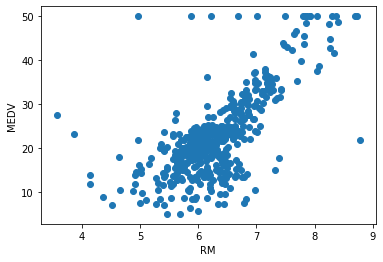

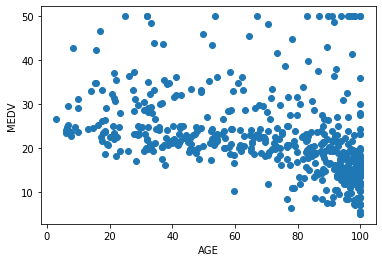

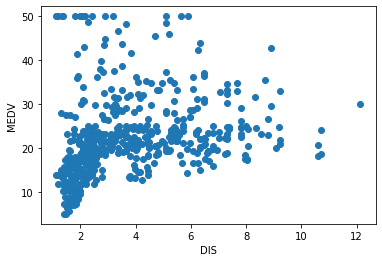

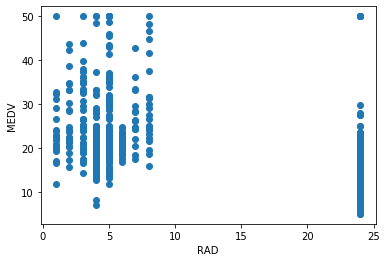

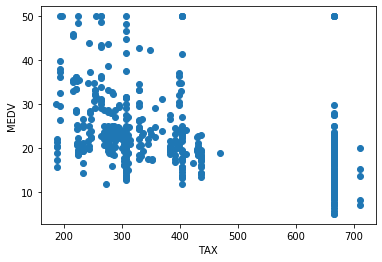

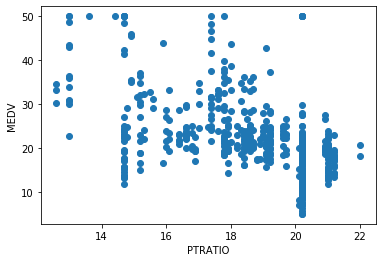

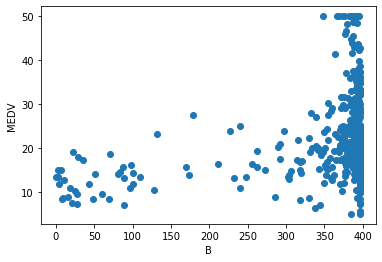

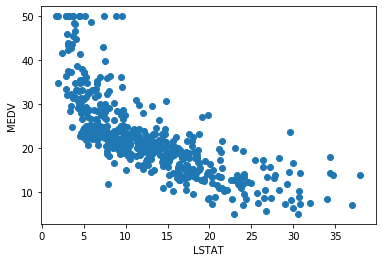

In [4]:
for i in columns[:-1]:
    plt.figure()
    plt.scatter(dataset[i], dataset["MEDV"])
    plt.xlabel(i)
    plt.ylabel("MEDV")
    plt.show()

# Preprocessing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
scaler = preprocessing.StandardScaler().fit(dataset)
dataset_scaled = pd.DataFrame(scaler.transform(dataset),columns=columns)
#dataset_scaled
train_data=dataset_scaled.drop("MEDV", axis=1)
test_data=dataset_scaled["MEDV"]
dataset_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


[Text(0.5, 1, 'Correlation Matrix')]

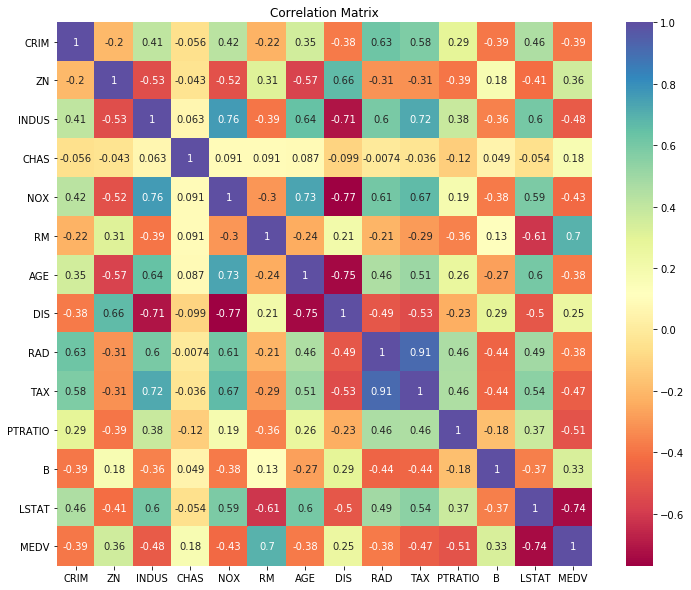

In [7]:
# Correlation matrix
corr = dataset_scaled.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

# Apply PCA to remove correlation

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components="mle", whiten=True,svd_solver ="full").fit(train_data)
new_set=pca.transform(train_data)
print("New Dimension of Train_data after PCA: ", len(new_set[0]))


New Dimension of Train_data after PCA:  12


# Linear Regression - Train the model

In [9]:
def LinearRegressionModel(lambdaa):
    bins = np.linspace(0, len(dataset_scaled), int(math.ceil(len(dataset_scaled)/50)))

    y_binned = np.digitize(test_data, bins)

    X_train_cross, X_test, y_train_cross, y_test = train_test_split(new_set,test_data,
                                                        test_size=0.2, stratify=y_binned)

    
    err_polynomials=[]
    err_trainn=[]
    for i in range(1,7):
        poly = PolynomialFeatures(degree=i, include_bias=True)
        err=0
        err_train=0
        trials=25

        for z in range(trials):
            bins = np.linspace(0, len(X_train_cross), int(math.ceil(len(X_train_cross)/50)))
            y_binned = np.digitize(y_train_cross, bins)
            

            X_train, X_cross, y_train, y_cross = train_test_split(X_train_cross,y_train_cross,
                                                        test_size=0.16,stratify=y_binned)

            x_train_trans = poly.fit_transform(X_train)
            x_test_trans = poly.transform(X_cross)
            #include bias parameter
            lr = linear_model.Ridge(alpha=lambdaa).fit(x_train_trans, y_train)

            y_pred = lr.predict(x_test_trans)
            #print(r2_score(y_cross, y_pred))
            y_pred_train=lr.predict(x_train_trans)





    #reg = LinearRegression().fit(X_train, y_train)
    #y_pred_test = reg.predict(X_test)
            err+=mean_squared_error(y_cross, y_pred)
            err_train+=mean_squared_error(y_train, y_pred_train)
        err_polynomials.append(err/trials) 
        err_trainn.append(err_train/trials)
    return err_trainn,err_polynomials        

In [10]:
def plot(err_trainn,polynomials):
    
    plt.plot(range(1,7),err_polynomials,  "-b",label = 'Cross Validation Error')
    plt.plot(range(1,7),err_trainn,  "-r", label = 'Train error')
    plt.xlabel("Degree of Polynomial")
    plt.ylabel("Cost Function")
    plt.show()

# Test

In [11]:
def Test(best_lambda_degree):
    bins = np.linspace(0, len(dataset_scaled), int(math.ceil(len(dataset_scaled)/50)))
    y_binned = np.digitize(test_data, bins)
    X_train_cross, X_test, y_train_cross, y_test = train_test_split(new_set,test_data,
                                                        test_size=0.2, stratify=y_binned)
    
    bins = np.linspace(0, len(X_train_cross), int(math.ceil(len(X_train_cross)/50)))
    y_binned = np.digitize(y_train_cross, bins)

    X_train, X_cross, y_train, y_cross = train_test_split(X_train_cross,y_train_cross,
                                                        test_size=0.16,stratify=y_binned)
    
    
    
    poly = PolynomialFeatures(degree=best_lambda_degree[1], include_bias=True)
    x_train_trans = poly.fit_transform(X_train)
    x_test_trans = poly.transform(X_test)


    lr = linear_model.Ridge(alpha=best_lambda_degree[0])
    lr.fit(x_train_trans, y_train)
    y_pred = lr.predict(x_test_trans)
    err=mean_squared_error(y_test, y_pred)
    return err

# Regularization

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.46612e-21): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.44115e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.14289e-20): result may not

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=8.9869e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.15821e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.67886e-18): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.70317e-18): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.60094e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.98962e-19): result may not be accurate.
  overwrite_a=False)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matri

lambda= 0
Avg Cross Validation Error of each degree:  [0.29701820287589453, 0.2258007796276472, 667.1806258166722, 48.83028186221015, 32.40211673615093, 774.7872444182328] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2249562586195707, 0.06111845463370859, 4.707257076022858e-17, 5.798132001746231e-20, 1.586336936040916e-16, 1.5524225027698588e-14]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


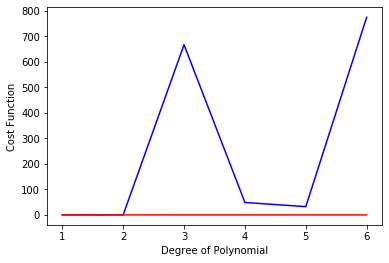

lambda= 0.01
Avg Cross Validation Error of each degree:  [0.3018417972522352, 0.17726078355428845, 68.75578834620453, 27.740080611429597, 60.85711167030854, 1124.1545025407074] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.25765727459932813, 0.06835523087751405, 0.001040715861721609, 1.5204895071662687e-07, 9.97258835770808e-09, 2.65156600639295e-09]


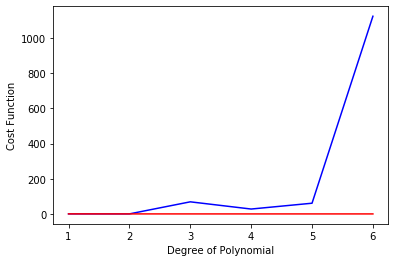

lambda= 0.02
Avg Cross Validation Error of each degree:  [0.32156864295349474, 0.19858952635799804, 40.95023669545578, 74.79832227779524, 626.3033508383244, 8531.785161563663] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2880439050931752, 0.07684230055649993, 0.0017586503234969413, 1.1225458964765715e-06, 9.64518917791229e-08, 3.589925099403683e-08]


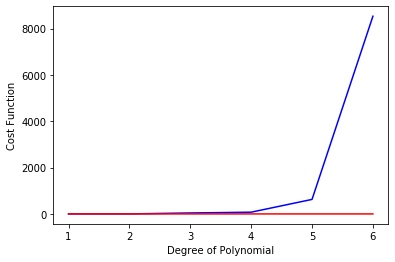

lambda= 0.04
Avg Cross Validation Error of each degree:  [0.3058402942222941, 0.16342039059035515, 18.29124027541633, 29.085990998845567, 69.48054739118385, 482.03146952631437] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2843300636951985, 0.07159107051851873, 0.002525112145327667, 6.4048962001756205e-06, 2.2560411730622985e-07, 4.35733310911579e-08]


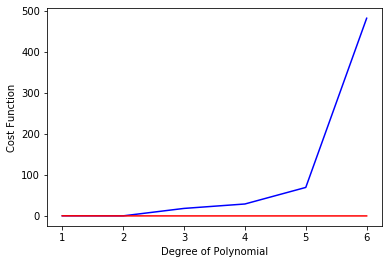

lambda= 0.08
Avg Cross Validation Error of each degree:  [0.29524908441319037, 0.18221146701660326, 59.390759356025576, 120.02652205908684, 288.71588965921615, 1790.4952417593238] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2821309950981005, 0.06973140295693468, 0.003491903270834944, 1.703696716696715e-05, 1.305220411903365e-06, 3.779692780702615e-07]


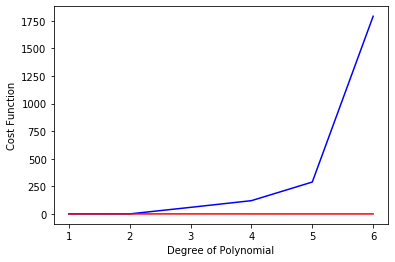

lambda= 0.16
Avg Cross Validation Error of each degree:  [0.2597116121110928, 0.1872712970111982, 6.225307609681546, 82.27427004136077, 967.7354214214809, 1142.8705414432275] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.248442109763328, 0.0579539502116646, 0.004274195176548997, 5.5416697298641645e-05, 5.231755657335765e-06, 2.0293221568538877e-06]


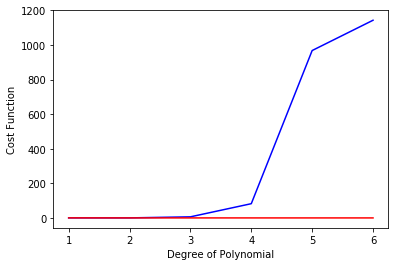

lambda= 0.32
Avg Cross Validation Error of each degree:  [0.3033559669324734, 0.2308531213441676, 2.6522221208721977, 23.01968575655617, 105.28705922100146, 846.0332587425629] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.29572769492811574, 0.07525793663984523, 0.005871907924482156, 0.0001259565725230276, 1.3131582576556237e-05, 3.4878726751201404e-06]


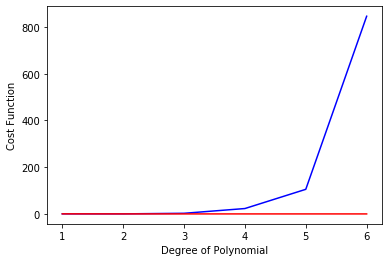

lambda= 0.64
Avg Cross Validation Error of each degree:  [0.3453113008482484, 0.22603522295179296, 9.994550356859651, 7.670268946844828, 75.48450192053406, 3513.9302401109458] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2759100582572519, 0.0743248605737525, 0.00774476966154106, 0.00023731687062031822, 3.190517541380318e-05, 9.29206064818112e-06]


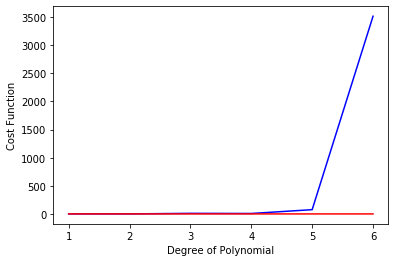

lambda= 1.28
Avg Cross Validation Error of each degree:  [0.28686464670735184, 0.17497067642578543, 2.514782818306885, 15.046314873452573, 43.843356000980364, 57.21860333197322] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2746020889020779, 0.06933863955229787, 0.00933092165541986, 0.0008680750028139622, 0.0001488720576289414, 5.480914039636205e-05]


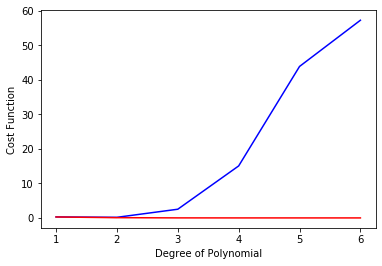

lambda= 2.56
Avg Cross Validation Error of each degree:  [0.30933236737974296, 0.15099558874233812, 0.7830115038324944, 2.8439751694659963, 10.98055538817608, 345.3727255458338] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26441174153158803, 0.06324484154158831, 0.012013237061212902, 0.0013865176999477184, 0.0003147658578093146, 0.00010333062444476269]


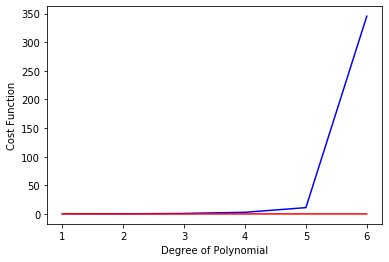

lambda= 3
Avg Cross Validation Error of each degree:  [0.2895623928358012, 0.16937797286981884, 2.356507426838422, 10.26422483132826, 37.00370262903139, 5293.99046704934] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.24843894433242103, 0.06629946641360952, 0.010908405643573572, 0.0015129950210351472, 0.000384814123935695, 0.00014077450740885813]


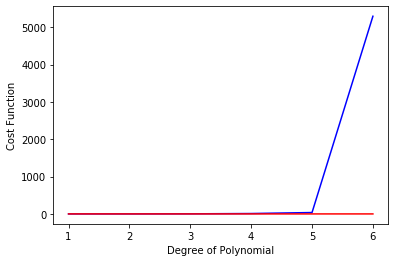

lambda= 4
Avg Cross Validation Error of each degree:  [0.30334500289938593, 0.2087412587096134, 0.9525229982885594, 28.568492260645012, 153.3586686390032, 331.15139150415524] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2603399516553307, 0.07578135746527974, 0.01630814856857553, 0.0024230829108218993, 0.0005722158463943418, 0.00018511768801184576]


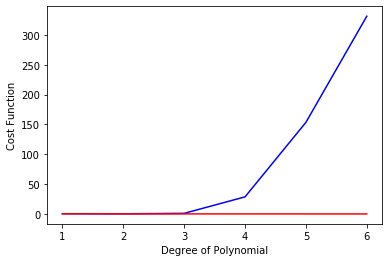

lambda= 5.12
Avg Cross Validation Error of each degree:  [0.30871711447871336, 0.16049284634161598, 0.5751264650460789, 3.714542425673908, 25.44221789413784, 1011.7581832747707] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2619467005855295, 0.06735989350597583, 0.014851235250670653, 0.002543088700597497, 0.0007045510185038975, 0.00027242252216299327]


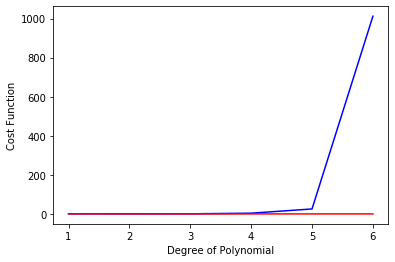

lambda= 6
Avg Cross Validation Error of each degree:  [0.33891756236833975, 0.15582166587523372, 0.5938389363625862, 3.6887859617178935, 19.50097547942681, 330.3307071800163] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2796752199824224, 0.07475783355249942, 0.01766944680146196, 0.003534585791585237, 0.001053613739862258, 0.0004379589369195193]


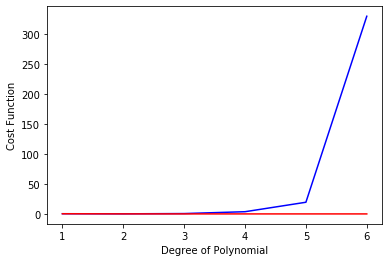

lambda= 7
Avg Cross Validation Error of each degree:  [0.3156380186103013, 0.17535899489129528, 0.7470928558989048, 3.9532048629854084, 13.254304460745129, 618.885332669504] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2664423079111733, 0.07560056342830464, 0.01749914262881428, 0.0033857632583318598, 0.0010756116745457341, 0.0004739712182490637]


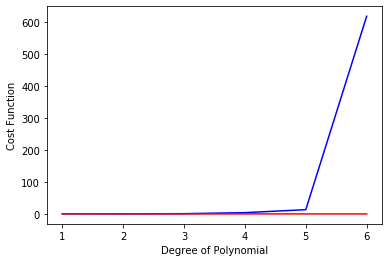

lambda= 8
Avg Cross Validation Error of each degree:  [0.32576619379343946, 0.18990117969535214, 1.2533328757526847, 4.256540707495128, 90.48804325920472, 3307.385286450382] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2818202468556779, 0.08166693872046185, 0.019163378558178994, 0.0035725646183650504, 0.0011938424657619714, 0.0005258620378607453]


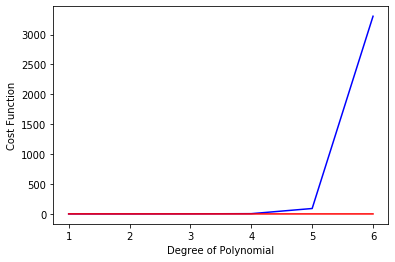

lambda= 10.24
Avg Cross Validation Error of each degree:  [0.2946341812470465, 0.16780930292312107, 3.5436594877343315, 1.8429560062020744, 23.890161803258934, 2061.9771327802887] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.268832191152562, 0.07977162190019867, 0.022445745494119214, 0.0047567775175280744, 0.0016179553718393572, 0.0007204533766376515]


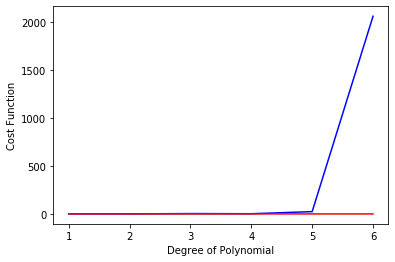

lambda= 15
Avg Cross Validation Error of each degree:  [0.3448697592600189, 0.19174214124744665, 0.6562340940627025, 4.460385507058017, 68.28221849534825, 2376.1574150696383] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26606970005778996, 0.0784015772772992, 0.02375651104820824, 0.0064425663239464715, 0.0024454940495007766, 0.001079393462254189]


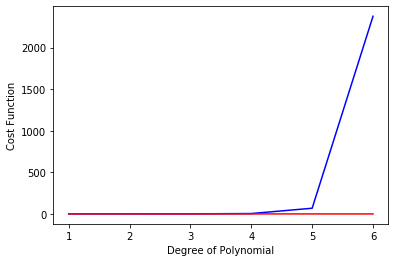

lambda= 16
Avg Cross Validation Error of each degree:  [0.28519106937530575, 0.1703286900189418, 0.3576878047439358, 5.476814057435527, 58.954273243137344, 475.47735402461365] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.26658437494628445, 0.07805656565729521, 0.024755159783225563, 0.0058980605340402635, 0.0022783809092104513, 0.0010560084731953646]


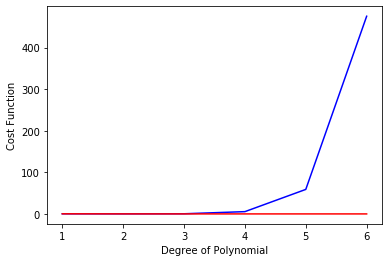

lambda= 17
Avg Cross Validation Error of each degree:  [0.35619090869635833, 0.16438851103850718, 0.48199270121417404, 2.658909293406702, 31.790193080180156, 181.43243780376747] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2812023683080021, 0.07615325906467513, 0.02334906131298991, 0.006063482876968044, 0.0022736222722481375, 0.0010955492134433135]


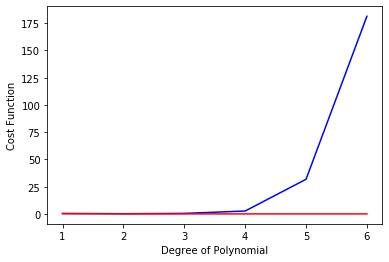

lambda= 18
Avg Cross Validation Error of each degree:  [0.27660946131087066, 0.16550312061763794, 0.35372626401905216, 1.6800678508831632, 69.9100652268959, 573.7293215797156] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2556621379526006, 0.07625229624140296, 0.02285148157553801, 0.005937559938754302, 0.0022862108135255407, 0.0010489678230019334]


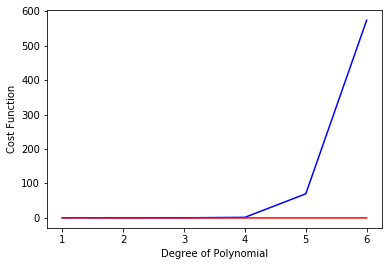

lambda= 19
Avg Cross Validation Error of each degree:  [0.30884922649522, 0.1778592841510126, 0.6930062340628398, 4.201993399332954, 55.414065664035334, 655.5536990047899] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2676319122756348, 0.0777334928819679, 0.025327046839982114, 0.006440921559638102, 0.0025243383872647863, 0.001272450661037457]


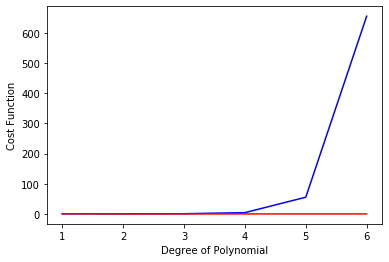

lambda= 20
Avg Cross Validation Error of each degree:  [0.3054007679056153, 0.20887103992093992, 0.5432825608983136, 4.325611894604947, 25.87695577196491, 475.3146749331845] 
 Polynomial degree=  2
Avg Train Error of each degree:  [0.2789299045424682, 0.08287444010387267, 0.025928229605938595, 0.006544046692180987, 0.002641418279951249, 0.0012853542415770137]


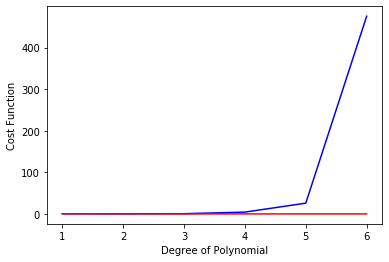

[2.56, 2]

In [12]:
from sklearn import linear_model
lambdaRanges=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,3,4,5.12,6,7,8,10.24,15,16,17,18,19,20]
best_error=math.inf
best_lambda_degree=[]
training_Cross_Error=[]
for i in lambdaRanges:
    err_trainn,err_polynomials = LinearRegressionModel(i)
    Best_polynomial_degree= err_polynomials.index(min(err_polynomials))+1
    print("lambda=", i)
    print("Avg Cross Validation Error of each degree: ", err_polynomials,"\n","Polynomial degree= ", Best_polynomial_degree)
    print("Avg Train Error of each degree: ",err_trainn)
    plot(err_trainn,err_polynomials)
    if min(err_polynomials) < best_error:
        best_error= min(err_polynomials)
        best_lambda_degree=[i,Best_polynomial_degree] 
    training_Cross_Error.append([min(err_trainn),min(err_polynomials)])    
best_lambda_degree        
    
    

# Conclusion

In [13]:
print( "The best model is obtained with lambda= " + str(best_lambda_degree[0]) + ", and with degree= " + str(best_lambda_degree[1]))
print("CrossValidation_Error= " + str (best_error))

The best model is obtained with lambda= 2.56, and with degree= 2
CrossValidation_Error= 0.15099558874233812


# Test Error

In [14]:
test_error=Test(best_lambda_degree)
print("Test_Error= " + str (test_error))

Test_Error= 0.12109292937836665


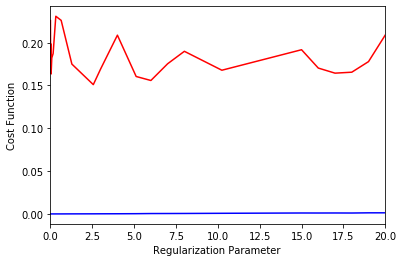

In [15]:
plt.figure()
plt.plot(lambdaRanges,np.array(training_Cross_Error)[:,0],"-b")
plt.plot(lambdaRanges,np.array(training_Cross_Error)[:,1],"-r")
plt.xlim([0,20])
plt.xlabel("Regularization Parameter ")
plt.ylabel("Cost Function")
plt.show()